**Task 1**

До:	(404, 13)
После:	(404, 2)


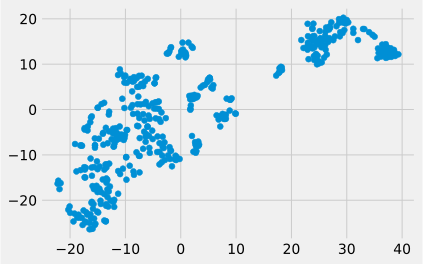

In [9]:
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

boston = load_boston()
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)
y_train_stand = scaler.fit_transform(y_train)
y_test_stand = scaler.fit_transform(y_test)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_stand)
print('До:\t{}'.format(X_train_stand.shape))
print('После:\t{}'.format(X_train_tsne.shape))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Task 2**

In [ ]:
print(boston['DESCR'])

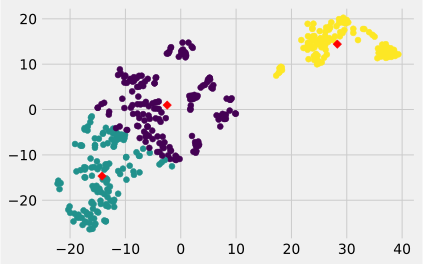

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_stand)
labels_train = kmeans.fit_predict(X_train_tsne)

centers = kmeans.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

Средние значения 'CRIM' для кластеров тренировочного набора данных.

In [44]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.6829679640718564
Кластер 1: 0.09462279411764711
Кластер 2: 13.17982178217822


Средние значения 'price' для кластеров тренировочного набора данных.

In [45]:
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Кластер 0: 23.67065868263472
Кластер 1: 26.564705882352936
Кластер 2: 16.277227722772285


**Task 3**

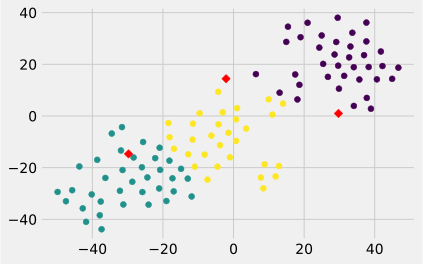

In [41]:
X_test_tsne = tsne.fit_transform(X_test_stand)
labels_test = kmeans.fit_predict(X_test_tsne)

centers_test = kmeans.cluster_centers_

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.scatter(centers_test[:, 0], centers[:, 1], marker='D', color='red')
plt.show()

Средние значения 'CRIM' для кластеров тестового набора данных.

In [42]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 9.9162925
Кластер 1: 0.11054861111111111
Кластер 2: 0.3130096666666667


Средние значения 'price' для кластеров тестового набора данных.

In [43]:
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

Кластер 0: 16.525
Кластер 1: 26.98055555555555
Кластер 2: 20.853333333333335
